In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython import display
import matplotlib.pyplot as plt
from scipy import stats

fileName = '24 HR RUNS//DETECTOR 2 - 24 HR RUN.TXT'


filePD = pd.read_csv(fileName, skiprows = 6, names = ['Entry','ArdTime','ADC', 'SiPM', 'Deadtime', 'Temp'], lineterminator='\n', sep='\s+', encoding = 'unicode_escape', engine ='python')



filePD.ArdTime = filePD.ArdTime/1000 # converting the ArdTime column from milliseconds to seconds

filePD.Deadtime = filePD.Deadtime/1000 # converting the Deadtime column from milliseconds to seconds


print(len(filePD.ADC))
filePD = filePD.drop(np.where(np.array(filePD.ADC)>500)[0])
print(len(filePD.ADC))

print(filePD)

164093
160781
         Entry    ArdTime  ADC   SiPM  Deadtime   Temp
0            1      0.904  112  22.94     0.000  17.35
2            3      1.307  152  26.78     0.034  17.35
3            4      1.678  167  28.76     0.053  17.35
4            5      2.525  134  24.82     0.072  17.35
5            6      2.886   51  15.86     0.096  17.35
...        ...        ...  ...    ...       ...    ...
164088  164089  86427.289  399  87.30  3355.810  20.90
164089  164090  86429.099  142  25.64  3355.830  20.90
164090  164091  86429.269  145  25.96  3355.850  20.90
164091  164092  86429.351  166  28.62  3355.870  20.90
164092  164093  86429.549  188  32.01  3355.890  20.90

[160781 rows x 6 columns]


Fitting 1 distributions: 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]


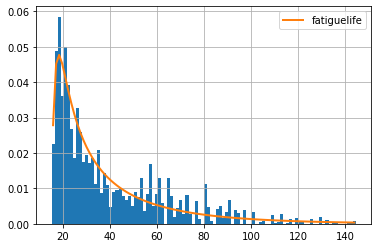

In [2]:
from fitter import Fitter, get_common_distributions, get_distributions


f = Fitter(filePD.SiPM, distributions=['fatiguelife'])

f.fit()
f.summary()

f.get_best(method = 'sumsquare_error')
params = f.fitted_param["fatiguelife"]

[ 15.29    16.3236  17.3572  18.3908  19.4244  20.458   21.4916  22.5252
  23.5588  24.5924  25.626   26.6596  27.6932  28.7268  29.7604  30.794
  31.8276  32.8612  33.8948  34.9284  35.962   36.9956  38.0292  39.0628
  40.0964  41.13    42.1636  43.1972  44.2308  45.2644  46.298   47.3316
  48.3652  49.3988  50.4324  51.466   52.4996  53.5332  54.5668  55.6004
  56.634   57.6676  58.7012  59.7348  60.7684  61.802   62.8356  63.8692
  64.9028  65.9364  66.97    68.0036  69.0372  70.0708  71.1044  72.138
  73.1716  74.2052  75.2388  76.2724  77.306   78.3396  79.3732  80.4068
  81.4404  82.474   83.5076  84.5412  85.5748  86.6084  87.642   88.6756
  89.7092  90.7428  91.7764  92.81    93.8436  94.8772  95.9108  96.9444
  97.978   99.0116 100.0452 101.0788 102.1124 103.146  104.1796 105.2132
 106.2468 107.2804 108.314  109.3476 110.3812 111.4148 112.4484 113.482
 114.5156 115.5492 116.5828 117.6164 118.65   119.6836 120.7172 121.7508
 122.7844 123.818  124.8516 125.8852 126.9188 127.9524

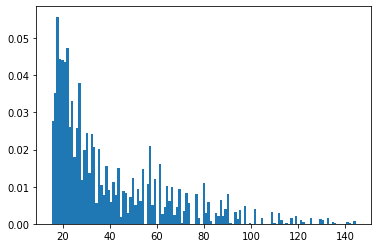

In [3]:
bins = 125

histogramPlot = plt.hist(filePD.SiPM, bins = bins , density = True) # Calling the histogram matplotlib function and providing the spreadsheet column in use and the number of bins we will use

voltage = histogramPlot[1]

idealDist = stats.fatiguelife.pdf(voltage, *params)

print(voltage)

100


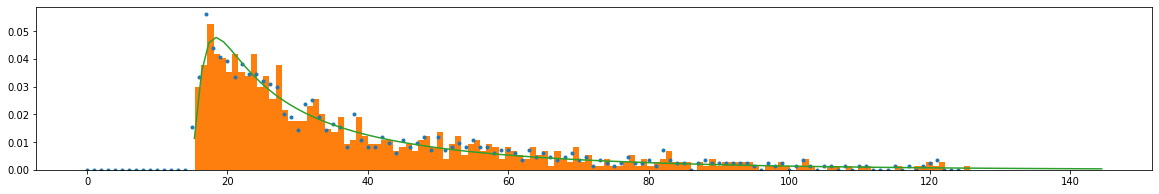

In [4]:

d = len(voltage)

i = 0
# so two things to make sure that im doing this right oh wow this is alot of fun 
N = 100000
voltageArr = np.array([])
master = []
iterations = []
while i < N:

    randVoltage = np.random.uniform(voltage[0], d)

    prob = stats.fatiguelife.pdf(randVoltage, *params) # find the probability of getting this exact voltage

    if prob > np.random.rand():
        voltageArr = np.append(voltageArr, randVoltage)

    i += 1 # update the loop variable 
    if i % 1000 == 0:
        master.append(voltageArr)
        iterations.append(i)
#     if i % 10000 == 0:
#         hist, bin_edges = np.histogram(voltageArr, bins=bins, density=False)
#         plt.plot(np.arange(bins), hist, '.')
#         probs, bin_edges = np.histogram(voltageArr, np.arange(bins+1))
#         probs = probs/len(voltageArr)
#         plt.plot(np.arange(bins), probs, '.')
#         plt.show()
    

print(len(master))

probs, bin_edges = np.histogram(voltageArr, np.arange(bins+1))
probs = probs/len(voltageArr)
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(np.arange(bins), probs, '.')
plt.hist(voltageArr, bins = bins, density = True)
plt.plot(voltage, idealDist)


In [6]:
import imageio

def create_frame(i, array, bins):
    fig = plt.figure(figsize=(10, 5))
    probs, bin_edges = np.histogram(array, np.arange(bins+1))
    probs = probs/len(array)
    plt.plot(np.arange(bins), probs, '.')
    plt.plot(voltage, idealDist)
    plt.ylim(0,0.04)
    plt.title('iterations'+str(i))
    plt.savefig(f'img_{i}.png', transparent = False,  facecolor = 'white')
    plt.close()

frames = []
i = 0
for arr in master:
    create_frame(iterations[i], arr, bins)
    image = imageio.imread(f'img_{iterations[i]}.png')
    frames.append(image)
    print('done')
    i += 1

imageio.mimsave('example.gif', # output gif
                frames,          # array of input frames
                fps = 5) 



<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')


done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')


done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')


done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')


done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')


done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')


done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')


done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
done
done


<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations[i]}.png')
<ipython-input-6-1a1cc6dc131d>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img_{iterations

done
